In [1]:
!pip install figrecipes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 3.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from figrecipes import PlotlyFig
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
plt.rcParams.update(rcParamsDefault)
large = 22; med = 16; small = 14
params = {'legend.fontsize': med,
      'figure.figsize': (8, 6),
      'axes.labelsize': med,
      'axes.titlesize': med,
      'xtick.labelsize': med,
      'ytick.labelsize': med,
      'figure.titlesize': large,
      'image.origin': 'lower',
      'xtick.major.size': 4,
      'ytick.major.size': 4,
      'xtick.major.width': 0.5,
      'ytick.major.width': 0.5,
      'xtick.minor.size': 4,
      'xtick.minor.width': 0.5,
      'ytick.minor.size': 4,
      'ytick.minor.width': 0.5,
      'axes.linewidth': 0.75,
      'xtick.direction' : 'in', 
      'ytick.direction' : 'in', 
      'font.family': 'sans-serif', 
      'font.sans-serif' : 'Open Sans',
      'font.weight': 'light', # ultralight, light, regular, medium, bold 
      'font.style': 'normal', # normal, italic
}
plt.rcParams.update(params)

plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"

In [4]:
data = pd.read_csv('data_Hpredicted_7.csv')

In [5]:
data.columns

Index(['Number', 'MP_id', 'Chemical Formula', 'Bv', 'Br', 'Gr', 'Gv', 'E',
       'poisson_ratio', 'Rx', 'Aw', 'H_predicted', 'e_above_hull'],
      dtype='object')

In [6]:
data.H_predicted

0      21.409950
1      46.620362
2      23.745956
3      16.605791
4      14.745030
         ...    
630    20.893608
631    16.773384
632    10.839200
633    10.120619
634    24.523747
Name: H_predicted, Length: 635, dtype: float64

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

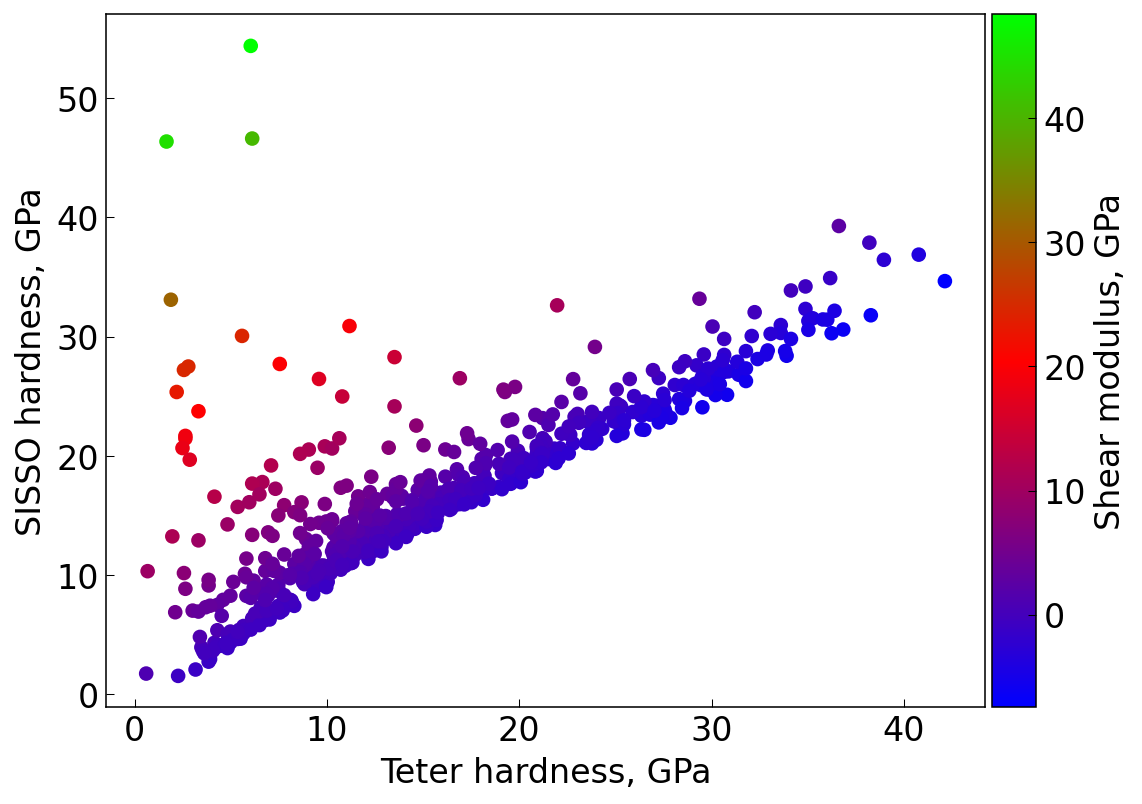

In [8]:
#x1 = [0, 400]
#y1 = [0, 400]
#f = y - lr.predict(X)
plt.figure(figsize = (4, 2))
fig, ax = plt.subplots()
#ax.scatter(x=y, y=lr.predict(X), s=1)
im = ax.scatter(
    x=0.151 * (data.Gr + data.Gv) / 2, #data.Bv / data.poisson_ratio, 
    y=data.H_predicted, 
    #s=data.poisson_ratio*100, 
    c=data.H_predicted - 0.151 * (data.Gr + data.Gv) / 2,#data.Gr,
    cmap='brg')
#)
#plt.plot(x1, y1, linewidth=1, color='red')
#plt.xlim(0, 400)
#plt.ylim(-100, 400)
plt.xlabel('Teter hardness, GPa')
plt.ylabel('SISSO hardness, GPa')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Shear modulus, GPa')
plt.show()

In [ ]:
dataH = data[data['H_predicted'] > 40]
dataH

,Number,MP_id,Chemical Formula,Bv,Br,Gr,poisson_ratio,Rx,Aw,H_predicted
1,2,mp-1001788,ZrB6,179.0,179.0,2.0,0.39,2.06,51.017500,46.620
20,21,mp-1008635,WC,249.0,249.0,3.0,0.48,1.93,97.925350,46.369
383,384,mp-29056,La3InC,28.0,28.0,40.0,0.02,1.95,88.578057,54.393
390,391,mp-2967,La(CoB)2,647.0,87.0,128.0,0.26,1.95,69.549888,66.493
574,575,mp-7814,Ta2CS2,66.0,5.0,1.0,0.21,2.00,75.007860,40.498
593,594,mp-866650,La2Si4CN6,81.0,31.0,56.0,0.06,1.95,48.252093,45.979


In [ ]:
n = data.Bv - data.Br
data_layered = data[(data['Bv'] - data['Br'])/data['Bv'] > 0.2]
data_layered2 = data_layered[(data_layered['Gr']) < 10]
data_layered2

,Number,MP_id,Chemical Formula,Bv,Br,Gr,poisson_ratio,Rx,Aw,H_predicted
44,45,mp-10102,KAgC2,40.0,23.0,4.0,0.31,2.43,52.992400,6.079
126,127,mp-1029309,Na2HfN2,55.0,20.0,5.0,0.26,2.08,71.828823,12.405
129,130,mp-1029316,Na2ZrN2,53.0,19.0,4.0,0.27,2.06,42.740156,12.340
132,133,mp-1029336,KZnN,41.0,31.0,3.0,0.38,2.43,39.504667,4.974
190,191,mp-10421,RbAuC2,43.0,19.0,7.0,0.24,2.65,98.148356,7.996
191,192,mp-10422,NaAuC2,65.0,22.0,4.0,0.29,1.90,77.322346,14.987
192,193,mp-10423,KAuC2,53.0,22.0,5.0,0.30,2.43,82.691856,9.391
207,208,mp-10918,Rb2PdC2,39.0,23.0,7.0,0.31,2.65,67.966167,3.825
208,209,mp-10919,Rb2PtC2,49.0,25.0,7.0,0.30,2.65,97.520833,6.749
342,343,mp-23052,ZrIN,36.0,3.0,3.0,0.19,2.06,77.378390,13.619


In [ ]:
data1 = data[data['Bv'] < 50]
data1

,Number,MP_id,Chemical Formula,Bv,Br,Gr,poisson_ratio,Rx,Aw,H_predicted
44,45,mp-10102,KAgC2,40.0,23.0,4.0,0.31,2.43,52.992400,6.079
66,67,mp-1016601,Mg6NbC,45.0,36.0,25.0,0.22,1.98,43.074027,4.322
94,95,mp-1022207,Mg6FeC,41.0,23.0,13.0,0.28,1.56,30.720233,3.311
95,96,mp-1022553,Mg6ZrC,44.0,33.0,16.0,0.30,2.06,42.513233,2.600
132,133,mp-1029336,KZnN,41.0,31.0,3.0,0.38,2.43,39.504667,4.974
151,152,mp-1029502,Ba(NbN2)2,31.0,31.0,28.0,0.15,2.53,81.413360,4.151
157,158,mp-1029574,Na5OsN4,40.0,40.0,14.0,0.33,1.90,75.742156,1.546
160,161,mp-1029595,Na3OsN2,41.0,41.0,20.0,0.28,1.90,75.742156,2.079
161,162,mp-1029616,Ba(TaN2)2,41.0,41.0,25.0,0.24,2.53,110.760527,2.739
162,163,mp-1029640,Ba3OsN3,48.0,48.0,26.0,0.27,2.53,113.854567,2.949


In [ ]:
342/334

1.0239520958083832

<Figure size 600x300 with 0 Axes>

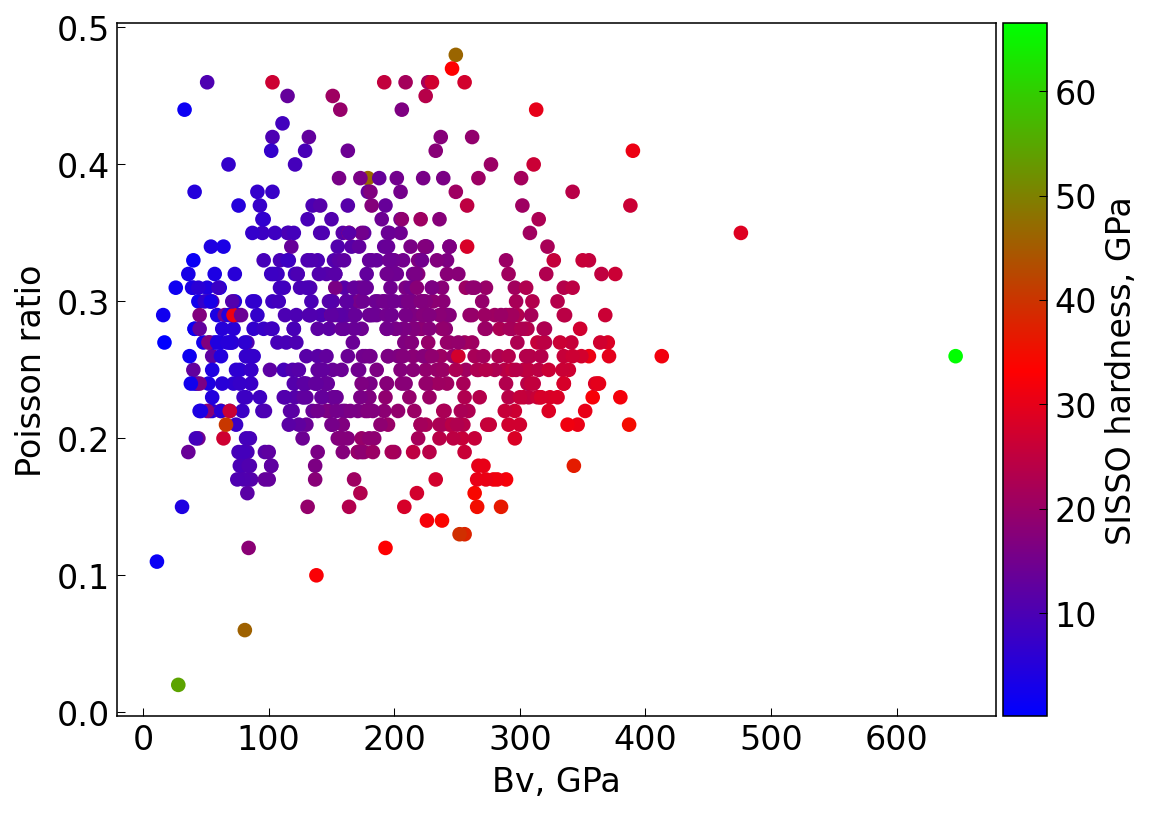

In [ ]:
#x1 = [0, 400]
#y1 = [0, 400]
#f = y - lr.predict(X)
plt.figure(figsize = (4, 2))
fig, ax = plt.subplots()
#ax.scatter(x=y, y=lr.predict(X), s=1)
im = ax.scatter(
    x=data.Bv, 
    y=data.poisson_ratio, 
    #s=e*200, 
    c=data.H_predicted,
    cmap='brg')
#)
#plt.plot(x1, y1, linewidth=1, color='red')
#plt.xlim(0, 400)
#plt.ylim(-100, 400)
plt.xlabel('Bv, GPa')
plt.ylabel('Poisson ratio')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('SISSO hardness, GPa')
plt.show()

<Figure size 600x300 with 0 Axes>

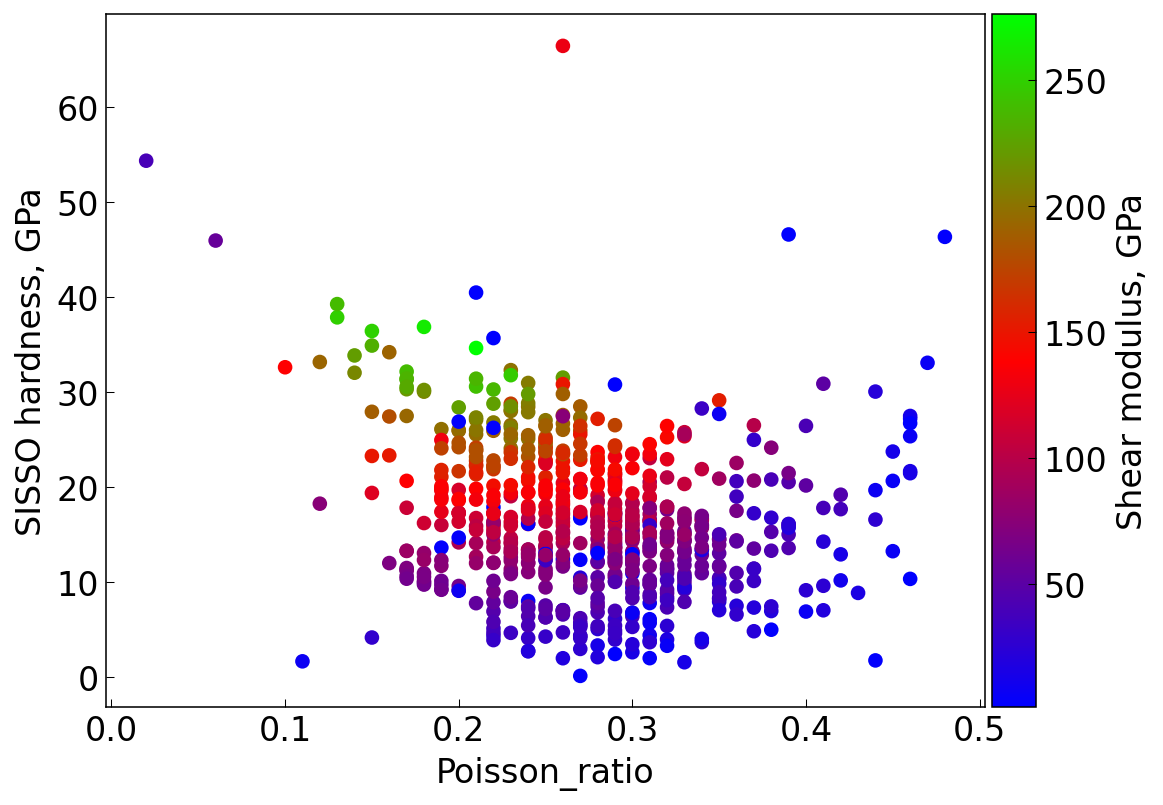

In [ ]:
#x1 = [0, 400]
#y1 = [0, 400]
#f = y - lr.predict(X)
plt.figure(figsize = (4, 2))
fig, ax = plt.subplots()
#ax.scatter(x=y, y=lr.predict(X), s=1)
im = ax.scatter(
    x=data.poisson_ratio, 
    y=data.H_predicted, 
    #s=e*200, 
    c=data.Gr,
    cmap='brg')
#)
#plt.plot(x1, y1, linewidth=1, color='red')
#plt.xlim(0, 400)
#plt.ylim(-100, 400)
plt.xlabel('Poisson_ratio')
plt.ylabel('SISSO hardness, GPa')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Shear modulus, GPa')
plt.show()

<Figure size 600x300 with 0 Axes>

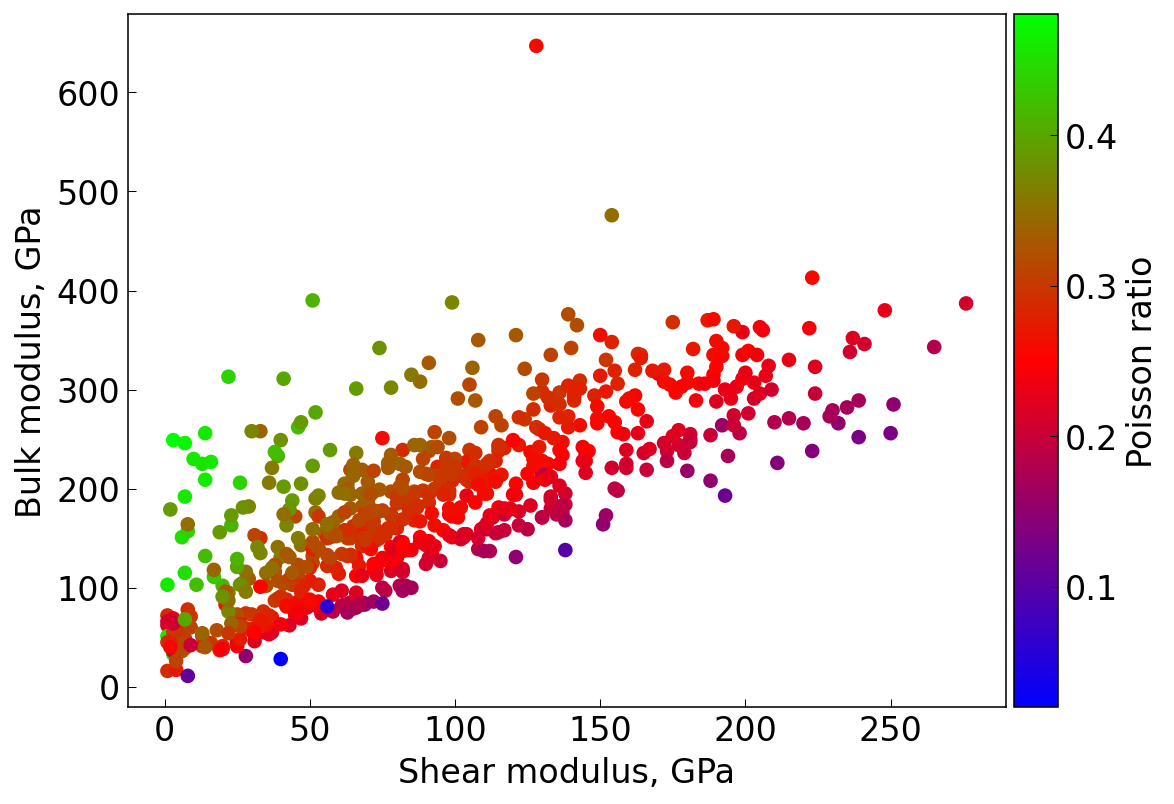

In [ ]:
#x1 = [0, 400]
#y1 = [0, 400]
#f = y - lr.predict(X)
plt.figure(figsize = (4, 2))
fig, ax = plt.subplots()
#ax.scatter(x=y, y=lr.predict(X), s=1)
im = ax.scatter(
    #x=data.Bv/data.poisson_ratio/(data.Gr)**0.33333 , 
    x=data.Gr,
    y=data.Bv, 
    #s=data.H_predicted*1.5, 
    c=data.poisson_ratio,
    cmap='brg')
#)
#plt.plot(x1, y1, linewidth=1, color='red')
#plt.xlim(0, 400)
#plt.ylim(-100, 400)
plt.xlabel('Shear modulus, GPa')
plt.ylabel('Bulk modulus, GPa')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Poisson ratio')
plt.show()

In [ ]:
from figrecipes import PlotlyFig
import plotly.express as px
fig = PlotlyFig(data, y_title='SISSO hardness, GPa', x_title='Bv / Sigma, GPa', filename='SISSO_hard')
fig.xy(('Bv', 'H_predicted'), labels='Chemical Formula', colors='Gr', colorscale='Picnic', limits={'x': (0, 700), 'y': (0, 80)})

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(data,
                 x="Bv", 
                 y="H_predicted",
                 color="poisson_ratio",  
                 size="Gr", 
                 hover_data=['Chemical Formula'],
                 )




fig.update_yaxes(range=[0, 80])
fig.update_xaxes(range=[0, 700])
fig.show()